# FunctionTranformer

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [59]:
dataset=pd.read_csv("Mobile_sales.csv")
dataset

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online
...,...,...,...,...,...,...,...,...,...,...,...
995,41f08915-addb-4966-8628-038c479c619a,2024-01-28,challenge,Brooks Ltd,1386.69,76,28865.70,39,Male,Ronaldchester,Credit Card
996,bcfa1912-5bd8-4894-900f-376fa48f022d,2024-07-13,least,"Lang, Brown and Stone",1159.26,59,50471.42,21,Other,West Jenniferport,Credit Card
997,e6839305-a177-4cda-aada-3ac1f49eeeec,2024-01-13,enjoy,"Atkinson, Moore and Nelson",544.31,59,1381.82,26,Female,Barneschester,Credit Card
998,12f7ac32-9063-4ae5-a122-385b06ba77af,2024-01-25,half,"Kim, Maxwell and Moore",331.98,84,8557.32,20,Male,Jonesborough,Online


In [60]:
dataset.head(4)

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash


In [61]:
dataset.isnull().sum()

TransactionID     0
Date              0
MobileModel       0
Brand             0
Price             0
UnitsSold         0
TotalRevenue      0
CustomerAge       0
CustomerGender    0
Location          0
PaymentMethod     0
dtype: int64

In [62]:
dataset.describe()

,Price,UnitsSold,TotalRevenue,CustomerAge
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,807.512970,50.074000,40218.445040,41.141000
std,402.489878,28.616804,32715.290358,13.528346
min,103.320000,1.000000,116.850000,18.000000
25%,458.037500,25.000000,13316.037500,29.000000
50%,823.730000,51.000000,30860.655000,41.000000
75%,1157.875000,75.000000,60770.435000,53.000000
max,1499.250000,99.000000,141411.840000,64.000000


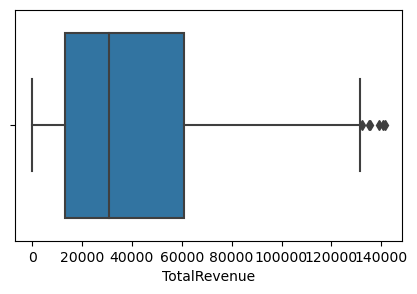

In [63]:
plt.figure(figsize=(5,3))
sns.boxplot(x="TotalRevenue",data=dataset)
plt.show()

In [64]:
q1=dataset["TotalRevenue"].quantile(0.25)
q3=dataset["TotalRevenue"].quantile(0.75)
q1,q3

(13316.0375, 60770.435)

In [65]:
iqr=q3-q1
iqr

47454.3975

In [66]:
min_r=q1-(1.5*iqr)
max_r=q3+(1.5*iqr)
min_r,max_r

(-57865.558750000004, 131952.03125)

In [67]:
newdataset=data[data["TotalRevenue"]<=max_r]
newdataset

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,TotalRevenue_tf
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,10.240095
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,7.774780
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,10.352126
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,10.346915
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,9.352218
...,...,...,...,...,...,...,...,...,...,...,...,...
995,41f08915-addb-4966-8628-038c479c619a,2024-01-28,challenge,Brooks Ltd,1386.69,76,28865.70,39,Male,Ronaldchester,Credit Card,10.270444
996,bcfa1912-5bd8-4894-900f-376fa48f022d,2024-07-13,least,"Lang, Brown and Stone",1159.26,59,50471.42,21,Other,West Jenniferport,Credit Card,10.829182
997,e6839305-a177-4cda-aada-3ac1f49eeeec,2024-01-13,enjoy,"Atkinson, Moore and Nelson",544.31,59,1381.82,26,Female,Barneschester,Credit Card,7.231880
998,12f7ac32-9063-4ae5-a122-385b06ba77af,2024-01-25,half,"Kim, Maxwell and Moore",331.98,84,8557.32,20,Male,Jonesborough,Online,9.054659


In [68]:
from sklearn.preprocessing import FunctionTransformer

In [69]:
ft=FunctionTransformer(np.log1p)

In [70]:
ft.fit(newdataset[["TotalRevenue"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [76]:
dataset["TotalRevenue_tf"]=ft.transform(newdataset[["TotalRevenue"]])

In [89]:
data.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod,TotalRevenue_tf
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online,10.240095
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card,7.774780
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online,10.352126
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash,10.346915
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online,9.352218


C:\Users\Ashish Kumar Singh\AppData\Local\Temp\ipykernel_8956\2817714712.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["TotalRevenue"])
C:\Users\Ashish Kumar Singh\AppData\Local\Temp\ipykernel_8956\2817714712.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["TotalRevenue

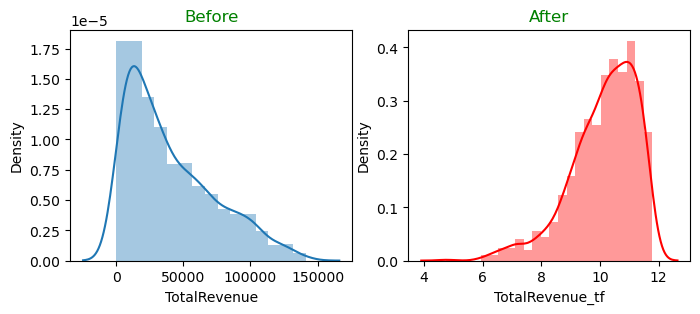

In [91]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title("Before",color="green")
sns.distplot(dataset["TotalRevenue"])

plt.subplot(1,2,2)
plt.title("After" ,color="green")
sns.distplot(dataset["TotalRevenue_tf"],color="red")
plt.show()